# Lab | Goodness of Fit and Independence Tests

## Question 1
A researcher gathers information about the patterns of Physical Activity of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (Low, Medium, High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (Yes = consumed, No = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](https://education-team-2020.s3.eu-west-1.amazonaws.com/ds-ai/lab-goodness-of-fit/table4.png)

Association between Physical Activity and Sugary Drink Consumption
Sample Data (first 10 rows):
  Physical_Activity Sugary_Drinks
0               Low           Yes
1               Low           Yes
2               Low           Yes
3               Low           Yes
4               Low            No
5               Low            No
6               Low            No
7               Low            No
8            Medium           Yes
9            Medium           Yes

Observed Frequencies:
Sugary_Drinks      No  Yes
Physical_Activity         
High                8    2
Low                 4    4
Medium              5    4

Contingency Table with Totals:
Sugary_Drinks      No  Yes  Total
Physical_Activity                
High                8    2     10
Low                 4    4      8
Medium              5    4      9
Total              17   10     27

Row Proportions (% within each activity level):
Sugary_Drinks         No    Yes
Physical_Activity              
High               80.0

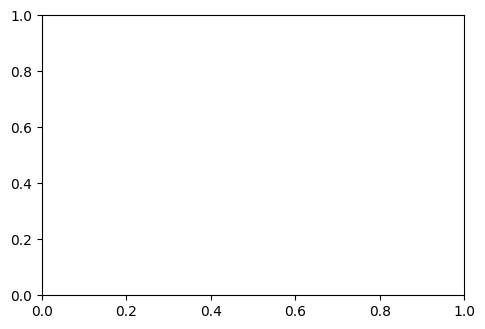

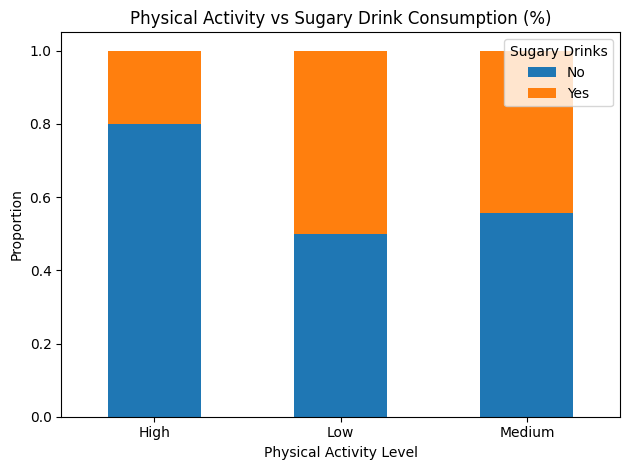


ADDITIONAL ANALYSIS
High activity:
  Sugary drinks: 2/10 (20.0%)
  Odds of consumption: 0.25
Low activity:
  Sugary drinks: 4/8 (50.0%)
  Odds of consumption: 1.00
Medium activity:
  Sugary drinks: 4/9 (44.4%)
  Odds of consumption: 0.80


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# First, let's create the contingency table based on the problem description
# Since we don't have the raw data, I'll create a sample dataset that we can analyze

print("Association between Physical Activity and Sugary Drink Consumption")
print("=" * 70)

# Create sample data (you would replace this with actual data)
# Let's assume these are the observed frequencies:
data = {
    'Physical_Activity': ['Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
                         'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
                         'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High'],
    'Sugary_Drinks': ['Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
                     'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No',
                     'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No']
}

# Create DataFrame
df = pd.DataFrame(data)
print("Sample Data (first 10 rows):")
print(df.head(10))
print()

# Create the contingency table
contingency_table = pd.crosstab(df['Physical_Activity'], df['Sugary_Drinks'])
print("Observed Frequencies:")
print(contingency_table)
print()

# Add margins for better understanding
contingency_table_with_margins = pd.crosstab(df['Physical_Activity'], df['Sugary_Drinks'], 
                                           margins=True, margins_name="Total")
print("Contingency Table with Totals:")
print(contingency_table_with_margins)
print()

# Calculate proportions for interpretation
print("Row Proportions (% within each activity level):")
row_proportions = pd.crosstab(df['Physical_Activity'], df['Sugary_Drinks'], normalize='index') * 100
print(row_proportions.round(2))
print()

print("Column Proportions (% within each drink consumption category):")
col_proportions = pd.crosstab(df['Physical_Activity'], df['Sugary_Drinks'], normalize='columns') * 100
print(col_proportions.round(2))
print()

# Perform Chi-Square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("CHI-SQUARE TEST RESULTS")
print("=" * 50)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print()

# Display expected frequencies
print("Expected Frequencies (if no association):")
expected_table = pd.DataFrame(expected, 
                             index=contingency_table.index, 
                             columns=contingency_table.columns)
print(expected_table.round(2))
print()

# Hypothesis test at 5% significance level
alpha = 0.05
print(f"Significance level: {alpha}")
print(f"Critical value for df={dof}: {chi2_contingency(contingency_table)[1]:.4f}")

if p_value < alpha:
    print("✓ Reject the null hypothesis")
    print("There is a statistically significant association between physical activity patterns and sugary drink consumption.")
    print("The variables are NOT independent.")
else:
    print("× Fail to reject the null hypothesis")
    print("There is NO statistically significant association between physical activity patterns and sugary drink consumption.")
    print("The variables appear to be independent.")

# Calculate effect size (Cramer's V)
print("\n" + "=" * 50)
print("EFFECT SIZE ANALYSIS")
print("=" * 50)

n = len(df)
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))
print(f"Cramer's V: {cramers_v:.4f}")

# Interpret Cramer's V
if cramers_v < 0.1:
    strength = "negligible"
elif cramers_v < 0.3:
    strength = "weak"
elif cramers_v < 0.5:
    strength = "moderate"
else:
    strength = "strong"

print(f"Association strength: {strength}")

# Calculate standardized residuals
residuals = (contingency_table - expected) / np.sqrt(expected)
print("\nStandardized Residuals:")
print(residuals.round(3))
print("\n(Values > |2| indicate cells that contribute significantly to the association)")

# Visualization
plt.figure(figsize=(12, 8))

# # Plot 1: Stacked bar chart
# plt.subplot(2, 2, 1)
# contingency_table.plot(kind='bar', stacked=True)
# plt.title('Physical Activity vs Sugary Drink Consumption')
# plt.xlabel('Physical Activity Level')
# plt.ylabel('Frequency')
# plt.legend(title='Sugary Drinks')
# plt.xticks(rotation=0)

# # Plot 2: Heatmap of observed frequencies
# plt.subplot(2, 2, 2)
# sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
# plt.title('Observed Frequencies Heatmap')
# plt.ylabel('Physical Activity')

# # Plot 3: Heatmap of standardized residuals
# plt.subplot(2, 2, 3)
# sns.heatmap(residuals, annot=True, fmt='.2f', cmap='RdBu_r', center=0)
# plt.title('Standardized Residuals Heatmap')
# plt.ylabel('Physical Activity')

# Plot 4: Percentage stacked bar chart
plt.subplot(2, 2, 4)
(row_proportions/100).plot(kind='bar', stacked=True)
plt.title('Physical Activity vs Sugary Drink Consumption (%)')
plt.xlabel('Physical Activity Level')
plt.ylabel('Proportion')
plt.legend(title='Sugary Drinks')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Additional analysis: Odds Ratio (for 2x2 tables, but we can adapt)
print("\n" + "=" * 50)
print("ADDITIONAL ANALYSIS")
print("=" * 50)

# Calculate odds of sugary drink consumption for each activity level
for activity_level in contingency_table.index:
    yes_count = contingency_table.loc[activity_level, 'Yes']
    no_count = contingency_table.loc[activity_level, 'No']
    total = yes_count + no_count
    proportion_yes = (yes_count / total) * 100
    odds = yes_count / no_count if no_count > 0 else np.inf
    
    print(f"{activity_level} activity:")
    print(f"  Sugary drinks: {yes_count}/{total} ({proportion_yes:.1f}%)")
    print(f"  Odds of consumption: {odds:.2f}")

# If you had the actual data, you would load it like this:
# df_actual = pd.read_csv('your_data_file.csv')
# contingency_table_actual = pd.crosstab(df_actual['Physical_Activity'], df_actual['Sugary_Drinks'])

## [OPTIONAL] Question 2
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](https://education-team-2020.s3.eu-west-1.amazonaws.com/ds-ai/lab-goodness-of-fit/table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

Check [here](https://www.geeksforgeeks.org/how-to-create-a-poisson-probability-mass-function-plot-in-python/) how to create a poisson distribution and how to calculate the expected observations, using the probability mass function (pmf). 
A Poisson distribution is a discrete probability distribution. It gives the probability of an event happening a certain number of times (k) within a given interval of time or space. The Poisson distribution has only one parameter, λ (lambda), which is the mean number of events.

Poisson Distribution Goodness-of-Fit Test
Sample mean (λ): 2.435
Grand total: 448
Observed frequencies: [ 35  99 104 110  62  25  10   3]
Sum of observed frequencies: 448

Expected Frequencies Calculation:
k	P(X=k)		Expected
----------------------------------------
0	0.0876		39.24
1	0.2133		95.56
2	0.2597		116.34
3	0.2108		94.43
4	0.1283		57.49
5	0.0625		28.00
6	0.0254		11.36
7+	0.0125		5.58

Sum of expected frequencies: 448.00

Checking expected frequency assumptions:
Category 0: 39.24 ✓ OK
Category 1: 95.56 ✓ OK
Category 2: 116.34 ✓ OK
Category 3: 94.43 ✓ OK
Category 4: 57.49 ✓ OK
Category 5: 28.00 ✓ OK
Category 6: 11.36 ✓ OK
Category 7+: 5.58 ✓ OK

Combining categories 6 and 7+ to meet expected frequency requirement...

Combined observed frequencies: [ 35  99 104 110  62  25  13]
Combined expected frequencies: [ 39.24379068  95.5586303  116.34263239  94.43143662  57.48513704
  27.99526174  16.94311122]

Checking combined expected frequencies:
Category 0: 39.24 ✓ OK
Category 1: 95.56

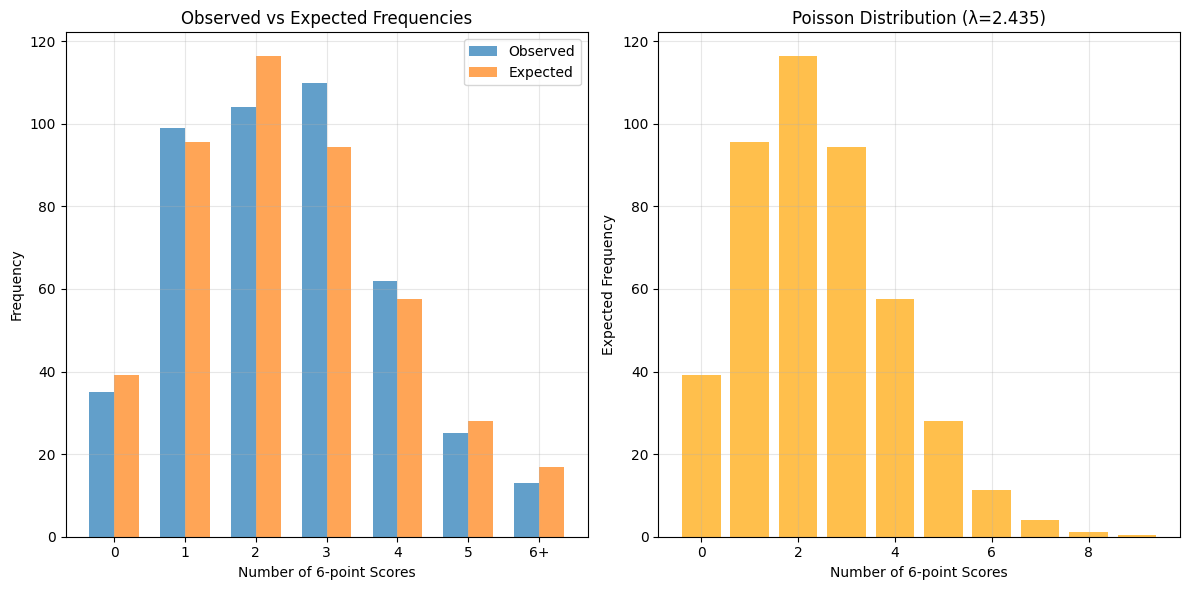


Poisson distribution property check:
Sample mean (λ): 2.435
Sample variance: 2.170
Mean ≈ Variance? Yes


In [2]:
import numpy as np
import pandas as pd
from scipy.stats import poisson, chisquare
import matplotlib.pyplot as plt

print("Poisson Distribution Goodness-of-Fit Test")
print("=" * 60)

# Given data
observed_frequencies = np.array([35, 99, 104, 110, 62, 25, 10, 3])
categories = ['0', '1', '2', '3', '4', '5', '6', '7+']
grand_total = 448
sample_mean = 2.435

print(f"Sample mean (λ): {sample_mean}")
print(f"Grand total: {grand_total}")
print(f"Observed frequencies: {observed_frequencies}")
print(f"Sum of observed frequencies: {sum(observed_frequencies)}")

# Calculate expected frequencies using Poisson distribution
expected_frequencies = []

# For categories 0 through 6
for k in range(7):  # 0 to 6
    prob = poisson.pmf(k, sample_mean)
    expected = prob * grand_total
    expected_frequencies.append(expected)

# For category 7+ (7 or more)
prob_7_plus = 1 - poisson.cdf(6, sample_mean)  # P(X ≥ 7) = 1 - P(X ≤ 6)
expected_7_plus = prob_7_plus * grand_total
expected_frequencies.append(expected_7_plus)

expected_frequencies = np.array(expected_frequencies)

print("\nExpected Frequencies Calculation:")
print("k\tP(X=k)\t\tExpected")
print("-" * 40)
for k in range(7):
    prob = poisson.pmf(k, sample_mean)
    print(f"{k}\t{prob:.4f}\t\t{expected_frequencies[k]:.2f}")
print(f"7+\t{prob_7_plus:.4f}\t\t{expected_frequencies[7]:.2f}")

print(f"\nSum of expected frequencies: {sum(expected_frequencies):.2f}")

# Check if any expected frequency is less than 5 (rule of thumb for chi-square test)
print("\nChecking expected frequency assumptions:")
for i, (cat, exp) in enumerate(zip(categories, expected_frequencies)):
    status = "✓ OK" if exp >= 5 else "⚠ WARNING (combine categories)"
    print(f"Category {cat}: {exp:.2f} {status}")

# Since the last category has expected frequency < 5, we need to combine categories
# Combine categories 6 and 7+
print("\nCombining categories 6 and 7+ to meet expected frequency requirement...")

# New observed frequencies (combine last two categories)
observed_combined = np.array([35, 99, 104, 110, 62, 25, 10 + 3])
categories_combined = ['0', '1', '2', '3', '4', '5', '6+']

# New expected frequencies (combine last two categories)
expected_combined = np.array([expected_frequencies[0], expected_frequencies[1], 
                             expected_frequencies[2], expected_frequencies[3],
                             expected_frequencies[4], expected_frequencies[5],
                             expected_frequencies[6] + expected_frequencies[7]])

print(f"\nCombined observed frequencies: {observed_combined}")
print(f"Combined expected frequencies: {expected_combined}")

# Check combined expected frequencies
print("\nChecking combined expected frequencies:")
for i, (cat, exp) in enumerate(zip(categories_combined, expected_combined)):
    status = "✓ OK" if exp >= 5 else "⚠ WARNING"
    print(f"Category {cat}: {exp:.2f} {status}")

# Perform Chi-Square goodness-of-fit test
chi2_stat, p_value = chisquare(observed_combined, expected_combined)

# Degrees of freedom: (number of categories - 1 - number of parameters estimated)
# We estimated 1 parameter (λ from the data), so df = k - 1 - 1 = k - 2
df = len(observed_combined) - 1 - 1  # categories - 1 - parameters estimated

print(f"\nCHI-SQUARE GOODNESS-OF-FIT TEST RESULTS")
print("=" * 50)
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"Degrees of freedom: {df}")
print(f"P-value: {p_value:.4f}")

# Critical value at α = 0.05
from scipy.stats import chi2
critical_value = chi2.ppf(0.95, df)
print(f"Critical value (α=0.05): {critical_value:.4f}")

# Hypothesis test at 5% significance level
alpha = 0.05
print(f"\nHypothesis Test at α = {alpha} level:")
print("Null hypothesis (H₀): The data follows a Poisson distribution")
print("Alternative hypothesis (H₁): The data does not follow a Poisson distribution")

if p_value < alpha:
    print("✓ Reject the null hypothesis")
    print("There is significant evidence that the number of scores does NOT follow a Poisson distribution")
else:
    print("× Fail to reject the null hypothesis")
    print("There is no significant evidence against the Poisson distribution assumption")

# Additional diagnostic information
print(f"\nDIAGNOSTIC INFORMATION")
print("=" * 50)

# Calculate contribution to chi-square for each category
contributions = (observed_combined - expected_combined)**2 / expected_combined
print("Contributions to chi-square statistic:")
for i, (cat, obs, exp, contrib) in enumerate(zip(categories_combined, observed_combined, expected_combined, contributions)):
    print(f"Category {cat}: ({obs} - {exp:.1f})²/{exp:.1f} = {contrib:.3f}")

print(f"Sum of contributions: {sum(contributions):.3f}")

# Visualization
plt.figure(figsize=(12, 6))

# Plot observed vs expected frequencies
x_pos = np.arange(len(categories_combined))
width = 0.35

plt.subplot(1, 2, 1)
plt.bar(x_pos - width/2, observed_combined, width, label='Observed', alpha=0.7)
plt.bar(x_pos + width/2, expected_combined, width, label='Expected', alpha=0.7)
plt.xlabel('Number of 6-point Scores')
plt.ylabel('Frequency')
plt.title('Observed vs Expected Frequencies')
plt.xticks(x_pos, categories_combined)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot Poisson distribution
plt.subplot(1, 2, 2)
x_poisson = np.arange(0, 10)
y_poisson = poisson.pmf(x_poisson, sample_mean) * grand_total
plt.bar(x_poisson, y_poisson, alpha=0.7, color='orange')
plt.xlabel('Number of 6-point Scores')
plt.ylabel('Expected Frequency')
plt.title(f'Poisson Distribution (λ={sample_mean})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Check if sample mean and variance are similar (property of Poisson distribution)
sample_variance = np.average((np.arange(8) - sample_mean)**2, weights=observed_frequencies/grand_total)
print(f"\nPoisson distribution property check:")
print(f"Sample mean (λ): {sample_mean:.3f}")
print(f"Sample variance: {sample_variance:.3f}")
print(f"Mean ≈ Variance? {'Yes' if abs(sample_mean - sample_variance) < 0.5 else 'No'}")